In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

In [4]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
df = df[[x for x in df.columns if x[:1]=='W']]

In [6]:
df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [32]:
pi = make_pipeline(StandardScaler(),PCA())

In [33]:
X = df.copy()

In [34]:
pi.fit(X)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [35]:
Xp = pd.DataFrame(pi.transform(X),columns=['p%d'%i for i in range(1,53)])

In [36]:
Xp.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52
0,0.454043,-0.605491,0.089528,0.111550,-0.116055,-0.241069,-0.517535,0.453950,0.326050,0.440777,...,-0.173137,-0.063063,0.420072,-0.007046,-0.066168,-0.138938,0.056317,0.257451,0.384385,0.527951
1,-2.960679,-0.550712,0.504477,-0.104548,0.138913,0.654364,0.027811,0.019329,0.135037,-0.303690,...,-0.095979,0.189981,-0.036308,-0.021914,-0.277463,-0.115504,0.105104,-0.271812,0.332691,0.106290
2,-0.092318,-0.236239,-0.335249,0.206005,-0.079839,0.122268,0.392276,0.071399,0.163026,0.398436,...,0.082484,0.139089,0.194825,0.146633,-0.215498,-0.084473,0.248730,-0.285542,0.102856,-0.161762
3,-0.366443,-0.320951,0.367784,-0.146317,0.518315,0.319099,0.274448,0.252620,0.038463,-0.015375,...,0.382353,0.324492,0.147183,-0.089278,-0.314409,-0.181360,-0.045552,-0.053609,-0.122464,0.141039
4,-0.283583,0.197145,0.466344,-0.357798,-0.466865,-0.702226,-0.158708,-0.199144,-0.194890,0.180215,...,-0.037301,-0.023287,-0.177866,-0.236334,0.005584,-0.106526,-0.038552,-0.250146,-0.209702,0.276246


In [37]:
pca.explained_variance_ratio_.cumsum()

array([0.91902118, 0.92963909, 0.93248476, 0.93509928, 0.93764144,
       0.94015696, 0.94260219, 0.94498998, 0.94721392, 0.94935011,
       0.9513895 , 0.95338602, 0.95533183, 0.95720986, 0.9590111 ,
       0.96075392, 0.96248565, 0.96415918, 0.96580953, 0.96740819,
       0.96896704, 0.97044637, 0.97190949, 0.97333613, 0.97475116,
       0.97613094, 0.97746251, 0.97875427, 0.9800026 , 0.98121292,
       0.98238501, 0.98353155, 0.98464535, 0.98573232, 0.9867569 ,
       0.9877352 , 0.98870926, 0.98965392, 0.99057128, 0.991461  ,
       0.99230445, 0.99312867, 0.99395069, 0.99475287, 0.99552474,
       0.99626794, 0.99695678, 0.99764065, 0.99828069, 0.99889974,
       0.99947954, 1.        ])

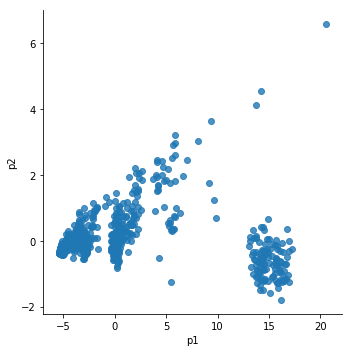

In [10]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [40]:
pickle.dump(pi,open('pipe_pca.m','wb'))

In [6]:
pi = pickle.load(open('pipe_pca.m','rb'))

In [7]:
type(pi)

sklearn.pipeline.Pipeline

In [9]:
Xp = pd.DataFrame(pi.transform(df),columns=['p%d'%i for i in range(1,53)])

In [14]:
nuevo_prod=[np.random.normal(loc=0,scale=1) for i in range(52)]

In [17]:
pi.transform(np.array(nuevo_prod).reshape(1,-1))

array([[-5.38418813, -0.39027227, -0.058825  , -0.02376726, -0.03069253,
         0.03478675,  0.12492861, -0.10657803,  0.03931447, -0.02824314,
         0.08884945,  0.02579154, -0.15290868, -0.09901705, -0.116441  ,
         0.0116523 ,  0.06019006, -0.0544607 ,  0.03957621, -0.04486163,
         0.19316685,  0.16291021,  0.00922455, -0.09831863, -0.06215125,
        -0.01100186, -0.01232283,  0.06200868, -0.02114443,  0.03542093,
         0.13661989, -0.06412406,  0.06717053,  0.028131  , -0.02232077,
        -0.05366954,  0.08328681,  0.04524507,  0.04474664,  0.0741769 ,
        -0.16143895,  0.05316529, -0.0868029 ,  0.15455939, -0.01138981,
        -0.10607558,  0.03392253,  0.10686429, -0.0881701 ,  0.15578295,
         0.00820647,  0.05704332]])